In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, explained_variance_score
from sklearn.linear_model import RidgeCV, LassoCV
from scipy.stats import pearsonr

# 1. Ładowanie danych oraz statystyki opisowe

In [104]:
df = pd.read_excel('LGD.xlsx', header=0)
Y = df.LGD.copy()
df.drop(["ID", "LGD", "Profil Klienta  (T/N)"], inplace=True, axis=1)
column_name_mapping = {'X' + str(i): df.columns[i] for i in range(len(df.columns))}
df.columns = ['X' + str(i) for i in range(len(df.columns))]
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,0.000000,0.000000,20820.630000,-20789.073333,288.986364,1.056850,9.06,9231.77,-250.320000,26121.85,0.553724,NaN,NaN
1,-36024.105000,0.000000,158663.425640,-158663.425640,-1463.699079,1.077212,198.15,492014.58,78531.170000,792479.60,0.104569,NaN,PO
2,-11613.000000,1769.006667,54669.011667,-113519.360000,-5872.169500,0.728765,15.42,46214.45,-10684.340000,209498.81,0.448170,NaN,NaN
3,-69166.666667,0.000000,98560.683333,-100000.000000,-9789.396224,1.000000,14.54,56465.70,5121.683333,194765.82,0.130746,NaN,NaN
4,0.000000,0.000000,0.000000,-30336.103333,-2969.166000,1.005205,14.30,30494.01,292.573333,27703.35,0.000000,NaN,NaN


In [105]:
column_name_mapping

{'X0': 'Średnia miesięczna wypłata gotówkowa zrealizowana przez Klienta Banku w ciągu ostatnich - 3 m-cy',
 'X1': 'Średnie saldo debetowe w ciągu ostatnich - 6 m-cy',
 'X2': 'Średnie saldo kredytowe w ciągu ostatnich - 6 m-cy',
 'X3': 'Średnie saldo w ciągu ostatnich - 3 m-cy',
 'X4': 'Trend dla średnich mies. sald w okresie ostatnich - 12 m-cy',
 'X5': 'Stosunek sumy sald na moment analizy do śr. salda sumarycznego w ciągu ostatnich - 3 m-cy',
 'X6': 'Suma zaległości odsetkowych na moment analizy',
 'X7': 'Suma zaległości kapitałowych na moment analizy',
 'X8': 'Średni przyrost kwoty zaległości kapitałowych w ciągu ostatnich 6 m-cy',
 'X9': 'Suma kwot z wszystkich mies. spłat dokonywanych przez klienta z tytułu posiadanych przez niego rachunków kredytowych',
 'X10': 'Współczynnik spłaty zaciągniętego kredytu, wyznaczany jako stosunek wartości wszystkich spłaconych kredytów do wartości wszystkich zaciągniętych/przyznanych kredytów',
 'X11': 'Status pierwszego rachunku kredytowego (otwa

In [106]:
descriptive_measures = df.describe()
descriptive_measures

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,1150.000000,1.152000e+03,1.152000e+03,1.152000e+03,1.118000e+03,912.000000,1152.000000,1.152000e+03,1118.000000,1.151000e+03,1152.000000
mean,-10945.348294,1.069521e+04,4.450643e+05,-4.585240e+05,-1.144872e+04,0.985780,445.967164,1.894203e+05,1951.313124,3.627039e+05,0.229477
std,34172.351577,7.957091e+04,2.294331e+06,2.103395e+06,1.858495e+05,0.857655,2899.744204,6.540699e+05,71455.915170,1.516040e+06,0.361450
min,-664333.333333,0.000000e+00,0.000000e+00,-3.901357e+07,-2.554672e+06,-7.578709,0.000000,0.000000e+00,-892622.760000,0.000000e+00,0.000000
25%,-5373.333333,0.000000e+00,0.000000e+00,-1.699901e+05,-5.004953e+03,0.791011,4.862500,1.075974e+04,-786.861667,4.349450e+03,0.001714
50%,0.000000,0.000000e+00,2.410960e+03,-2.440644e+04,-2.034551e+02,0.990289,13.840000,3.010012e+04,13.336667,2.417966e+04,0.104021
75%,0.000000,3.525271e+02,9.910462e+04,0.000000e+00,8.084551e+02,1.040184,85.702500,1.198997e+05,1251.327500,1.650381e+05,0.373790
max,0.000000,1.619703e+06,4.089370e+07,2.498350e+06,1.653337e+06,14.918763,73578.867700,9.692623e+06,835595.620000,2.502205e+07,7.441980


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 13 columns):
X0     1150 non-null float64
X1     1152 non-null float64
X2     1152 non-null float64
X3     1152 non-null float64
X4     1118 non-null float64
X5     912 non-null float64
X6     1152 non-null float64
X7     1152 non-null float64
X8     1118 non-null float64
X9     1151 non-null float64
X10    1152 non-null float64
X11    121 non-null object
X12    135 non-null object
dtypes: float64(11), object(2)
memory usage: 117.1+ KB


### Usuwamy Zmienne X11 i X12, w pozostałych przypadkach uzupełniamy brakujące wartości medianą

# 2. Czyszczenie danych

In [108]:
try:
    df.drop(['X11', 'X12'], inplace=True, axis=1)
except KeyError:
    pass
medians = descriptive_measures.loc['50%']
df.fillna(medians, inplace=True) # filling missing data with median

# 3. Eksploracja danych

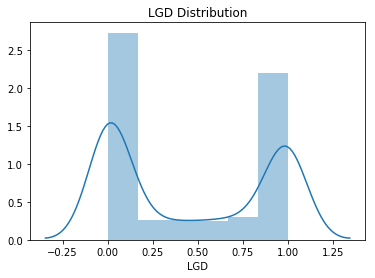

In [55]:
plt.title("LGD Distribution")
sns.distplot(Y)
plt.show()

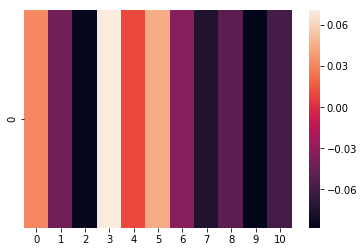

In [117]:
Y_corr = np.array(list(map(lambda col:pearsonr(Y.values, df[col].values)[0], df.columns.tolist())))
sns.heatmap(Y_corr.reshape(1, -1))

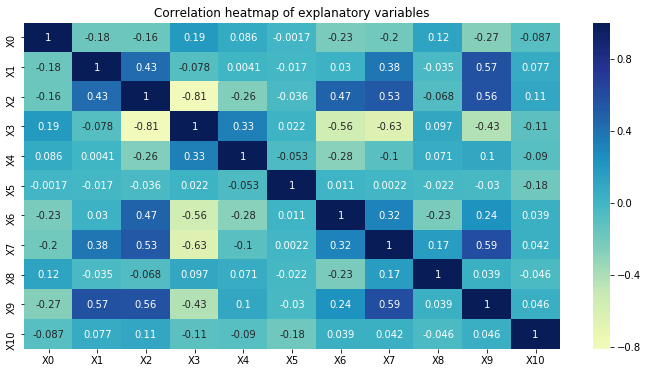

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Correlation heatmap of explanatory variables")
sns.heatmap(df.corr(), ax=ax, center=0, annot=True, cmap='YlGnBu')
plt.show()

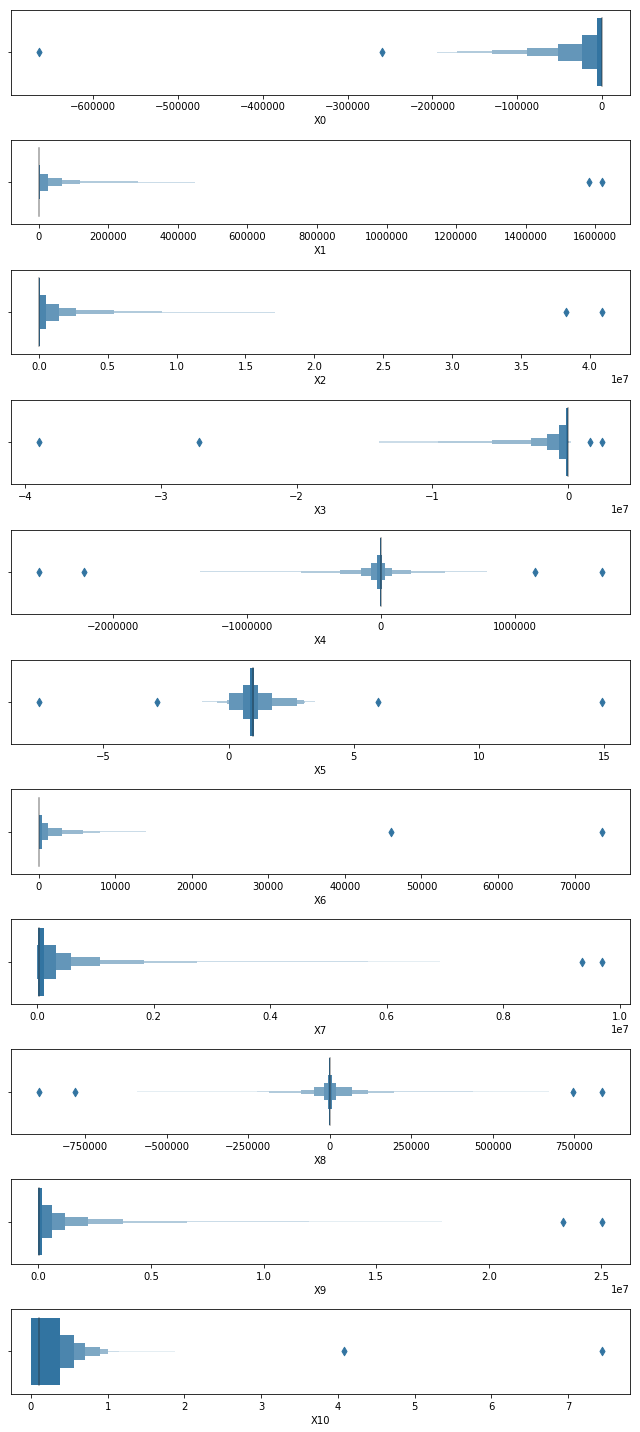

In [48]:
plt.subplots(figsize=(9, 20))
nrows = len(df.columns)
for i, column in enumerate(df.columns):
    plt.subplot(nrows, 1, i + 1)
    sns.boxenplot(df[column])
plt.tight_layout()

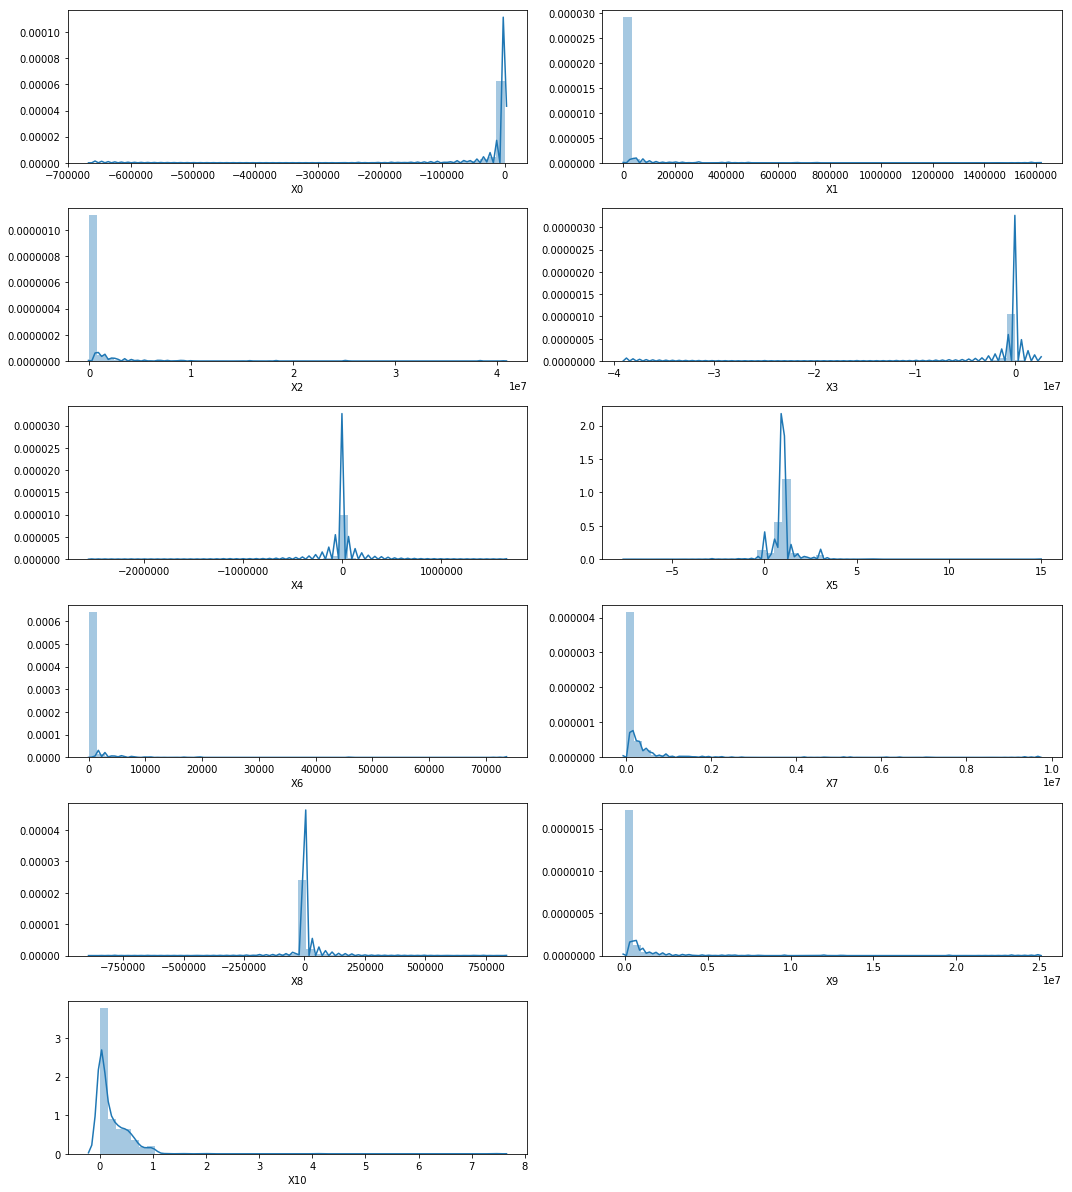

In [9]:
plt.subplots(figsize=(15, 30))
nrows = len(df.columns)
for i, column in enumerate(df.columns):
    plt.subplot(nrows, 2, i + 1)
    sns.distplot(df[column])
plt.tight_layout()

# 4. Preprocessing dancyh
- #### Normalizacja 
- #### podział na zbiór uczący i testowy

In [10]:
normalized_df = (df - df.mean()) / df.std()
X_train, X_test, Y_train, Y_test = train_test_split(normalized_df, Y, test_size=0.3)

# 5. Modelowanie danych
> #### Linowe modele
- #### Ridge Regression
- #### Lasso Regression

> #### Nieliniowe modele
- #### Support Vector Machine
- #### Gradient boosting
- #### Random forest
- #### Voting Regressor

In [74]:
ridge = RidgeCV(cv=5, normalize=False).fit(X_train, Y_train)
mean_absolute_error(ridge.predict(X_test), Y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.42550093368106789

In [71]:
lasso = LassoCV(cv=5).fit(X_train, Y_train)
mean_absolute_error(lasso.predict(X_test), Y_test)

0.42623552511024859

In [17]:
svr = SVR(gamma='scale', kernel='rbf')
gbr = GradientBoostingRegressor(n_estimators=100, criterion='friedman_mse')
rfr = RandomForestRegressor(n_estimators=100, criterion='mae')
vr = VotingRegressor(estimators=[
    ('Support Vector Regressor', svr), 
    ('Gradient Boosting Regressor',gbr),
    ('Random Forest Regressor',rfr)
])

In [20]:
svr = svr.fit(X_train, Y_train)
gbr = gbr.fit(X_train, Y_train)
rfr = rfr.fit(X_train, Y_train)
vr = vr.fit(X_train, Y_train)

# 6. Ewaluacja modeli
- #### MAE Score
- #### Residual plot

In [38]:
print('MAE SVR: ', mean_absolute_error(svr.predict(X_test), Y_test))
print('MAE GBR: ', mean_absolute_error(gbr.predict(X_test), Y_test))
print('MAE RFR: ', mean_absolute_error(rfr.predict(X_test), Y_test))
print('MAE Voting: ', mean_absolute_error(vr.predict(X_test), Y_test))

MAE SVR:  0.412122245395
MAE GBR:  0.400892425566
MAE RFR:  0.413382395314
MAE Voting:  0.40443319851


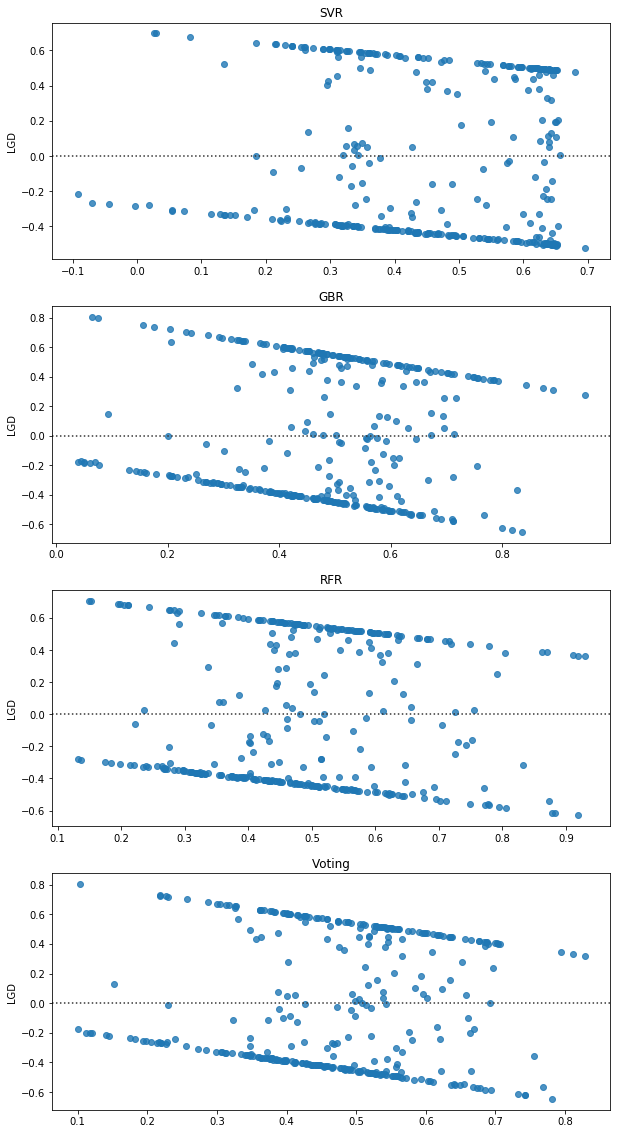

In [34]:
plt.subplots(figsize=(10, 20))
plt.subplot(4,1,1)
plt.title('SVR')
sns.residplot(x=svr.predict(X_test), y=Y_test)

plt.subplot(4,1,2)
plt.title('GBR')
sns.residplot(x=gbr.predict(X_test), y=Y_test)

plt.subplot(4,1,3)
plt.title('RFR')
sns.residplot(x=rfr.predict(X_test), y=Y_test)

plt.subplot(4,1,4)
plt.title('Voting')
sns.residplot(x=vr.predict(X_test), y=Y_test)

plt.show()

# 7. Wnioski
- ### Ze względu na bimodalną naturę współczynnika LGD, modelowanie go jest zadaniem trudnym
- ### Zmienne użyte w tej analizie nie są wystarczające by sensownie zmodelować LGD
- ### Bez względu na użytą metodę średni błąd kwadratowy wynosił ~0.4
- ### Patrząc na wykresy residuuów widzimy bimodalną naturę LGD

## W celu polepszenia wyników można zastosować:
- ### Znalezienie lepszych zmiennych
- ### Wykorzystać inżynierę cech aby zwiększyć ilość cech
- ### Zdyskretyzować LGD na przykładowo 3 rangi
- ### Lepszą metodę imputacji danych